## Final Project Submission

Please fill out:
* Student name: Maryam Ghaffari
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Overview

Entertainment industry has been characterized by growth over the recent years. No doubt investment in this industry would be a smart strategy for big corporations to achieve their market share. However it is a high risk industry and it is affected by many complex factors like movie quality, genre, leading actors, director, screenwriter, movie title, movie type, screen time, language, movie rating, release time, advertisement, production company, and distribution company. Microsoft has decided to create a new movie studio and they asked exploratory data analysis to help them to know what strategy is most profitable. In this project we asscess movies' boxoffice based on their genres, release time amd runtime. 

# Methodology

The general research strategy in this project is to do exploratory data analysis on the present data collection in the film industry. The process includes the below steps:

     . Import libraries and load dataset
     . Data cleaning
     . Asking Analytical Questions and Visualizations
     . Conclusion & Recommendations
    
    

## Import libraries and load dataset

To use libraries and modules in python, we need to import different libraries.

In [1]:
#Importing the libraries used throughout the project
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

import os

#Add plots to Jupyter noteboos
%matplotlib inline

# Suppress certain warning messages created from the output of 'iffy' commands
import warnings
warnings.filterwarnings('ignore')

There are 6 database in this project:

    1. bom.movie_gross.csv.gz
    2. tn.movie_budgets.csv.gz
    3. tmdb.movies.csv.gz
    4. rt.movie_info.tsv.gz
    5. rt.reviews.tsv.gz
    6. im.db
    
At first we should check our dataframs and select the dataframs that we can use for our analysis. Throuh .info() and .head() methods we can have a general idea about this datafram. In addithion with .isnull() and .duplicated() methods, we can decide for better selection.

#### 1. bom.movie_gross.csv.gz Datafram

In [2]:
# Read a comma-separated values (csv) file into DataFrame
movie_gross_df = pd.read_csv("bom.movie_gross.csv.gz")

# Print a concise summary of a DataFrame
print(movie_gross_df.info())

# To view a small sample of DataFrame object
movie_gross_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


#### 2. tn.movie_budgets.csv.gz Datafram

In [3]:
# Read a comma-separated values (csv) file into DataFrame
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv.gz")

# Print a concise summary of a DataFrame
print(movie_budgets_df.info())

# To view a small sample of DataFrame object
movie_budgets_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


#### 3. tmdb.movies.csv.gz Datafram

In [4]:
# Read a comma-separated values (csv) file into DataFrame
tmdb_movies_df = pd.read_csv("tmdb.movies.csv.gz")

# Print a concise summary of a DataFrame
print(tmdb_movies_df.info())

# To view a small sample of DataFrame object
tmdb_movies_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


#### 4. rt.movie_info.tsv.gz

In [5]:
# Read a comma-separated values (csv) file into DataFrame
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', header=0)

# Print a concise summary of a DataFrame
print(rt_movie_info_df.info())

# To view a small sample of DataFrame object
rt_movie_info_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


#### 5. rt.reviews.tsv.gz

In [6]:
# Read a comma-separated values (csv) file into DataFrame
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',header=0, encoding='latin-1')

# Print a concise summary of a DataFrame
print (rt_reviews_df.info())

# To view a small sample of DataFrame object
rt_reviews_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


## Data Cleaning

To start our project, we can check whether studios affect movie gross. 'movie_gross_df' dataframe has the information that we need to investigate. To begin with the dataframe we should fixing bad data in the data set. The first step to cleaning a dataframe is to deal with missing and duplicated values because they might cause mislead in results.

In [7]:
# Print a concise summary of a DataFrame
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#Detect missing values 
movie_gross_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Deciding on how to deal with missing value is an important part of data cleaning. For null values, based on the percentage of missing values we will decide to how to deal with them.   

In [9]:
# Define a function that takes in a column of df and a df, returns percentage
# of values missing in that column

def null_per (column, df):
    null_value_percentage = (column.isnull().sum() / len(df)) *100
    return null_value_percentage
    

In [10]:
# using the define function to calculate the percentage of null values
Studio_null_per = null_per( movie_gross_df['studio'], movie_gross_df)
print (f'The percentage of missing studio value is {round(Studio_null_per,2)}%.')

# using the define function to calculate the percentage of null values
Dom_null_per = null_per( movie_gross_df['domestic_gross'], movie_gross_df)
print (f'The percentage of missing domestic_gross value is {round(Dom_null_per,2)}%.')

# using the define function to calculate the percentage of null values
Foreign_null_per = null_per(movie_gross_df['foreign_gross'], movie_gross_df)
print (f'The percentage of missing foreign_gross value is {round(Foreign_null_per,2)}%.')

The percentage of missing studio value is 0.15%.
The percentage of missing domestic_gross value is 0.83%.
The percentage of missing foreign_gross value is 39.86%.


According to the percentage of null values in the dataframe we can remove null value in studio and domestic_gross but the foring_gross null value percentage is high and we should not delet null values. Since the data of foreign_gross are available in other dataframe we can ignore this colunm from this dataframe.

In [11]:
#Remove missing values.
cleaned_movie_gross_df = movie_gross_df.dropna(subset=['studio'])

In [12]:
#Remove missing values.
cleaned_movie_gross_df = cleaned_movie_gross_df.dropna(subset=['domestic_gross'])

In [13]:
#Drop specified labels from rows or columns
cleaned_movie_gross_df = cleaned_movie_gross_df.drop(columns='foreign_gross')

In [14]:
# Detect missing values.
cleaned_movie_gross_df.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

Now, we deleted missing values. The second step is to check duplications. If there are any duplicated rows we should drop them

In [15]:
# Indicat the sum of duplicated rows
cleaned_movie_gross_df.duplicated().sum()

0

By checking the movie_gross_df information we can see that the domestic_gross data type is float. It is better to change it to an integer.

In [16]:
#Chnag the data types to the specified type
cleaned_movie_gross_df ['domestic_gross'] = cleaned_movie_gross_df ['domestic_gross'].astype(int)

# Print a concise summary of a DataFrame
cleaned_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3356 non-null   object
 1   studio          3356 non-null   object
 2   domestic_gross  3356 non-null   int32 
 3   year            3356 non-null   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 118.0+ KB


The third step is to sort the data set according to the value we are going to visualise them. 

In [17]:
# Sort by the values along either axis
Top_gross_movie = cleaned_movie_gross_df.sort_values(['domestic_gross'],ascending=False)

# To view a small sample of DataFrame object
Top_gross_movie.head(10)

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,2015
3080,Black Panther,BV,700100000,2018
3079,Avengers: Infinity War,BV,678800000,2018
1873,Jurassic World,Uni.,652300000,2015
727,Marvel's The Avengers,BV,623400000,2012
2758,Star Wars: The Last Jedi,BV,620200000,2017
3082,Incredibles 2,BV,608600000,2018
2323,Rogue One: A Star Wars Story,BV,532200000,2016
2759,Beauty and the Beast (2017),BV,504000000,2017
2324,Finding Dory,BV,486300000,2016


 We can draw a scatter plot to investigate the relationship between a studio and the domestic gross of all movies produced by that studio. At first, we should group our data based on the studio. Then, normalize the sum of domestic gross by the number of movies.

In [18]:
# Group datafram base on studio
grouped_studio_df = cleaned_movie_gross_df.groupby('studio')['domestic_gross'].agg(['sum','count','mean','median'])

# Add a new column to the datafram
normalized_data = (grouped_studio_df ['sum']/grouped_studio_df ['count'])
grouped_studio_df ['normalized_data'] = normalized_data

#Reset the index, or a level of it
grouped_studio_df= grouped_studio_df.reset_index()

# Sort by the values along either axis
grouped_studio_df= grouped_studio_df.sort_values(['normalized_data'],ascending=False)

# To view a small sample of DataFrame object
grouped_studio_df.head(5)

,studio,sum,count,mean,median,normalized_data
36,BV,1.841903e+10,106,1.737644e+08,92100000.0,1.737644e+08
170,P/DW,1.682900e+09,10,1.682900e+08,157250000.0,1.682900e+08
245,WB (NL),3.995700e+09,45,8.879333e+07,63100000.0,8.879333e+07
236,Uni.,1.290239e+10,147,8.777138e+07,61000000.0,8.777138e+07
244,WB,1.216805e+10,140,8.691461e+07,47250000.0,8.691461e+07


In [19]:
# #Chnag the data types to the specified type
grouped_studio_df['normalized_data'] = grouped_studio_df['normalized_data'].astype(int)
grouped_studio_df['sum'] = grouped_studio_df['sum'].astype(int)
grouped_studio_df['mean'] = grouped_studio_df['mean'].astype(int)
grouped_studio_df['median'] = grouped_studio_df['median'].astype(int)


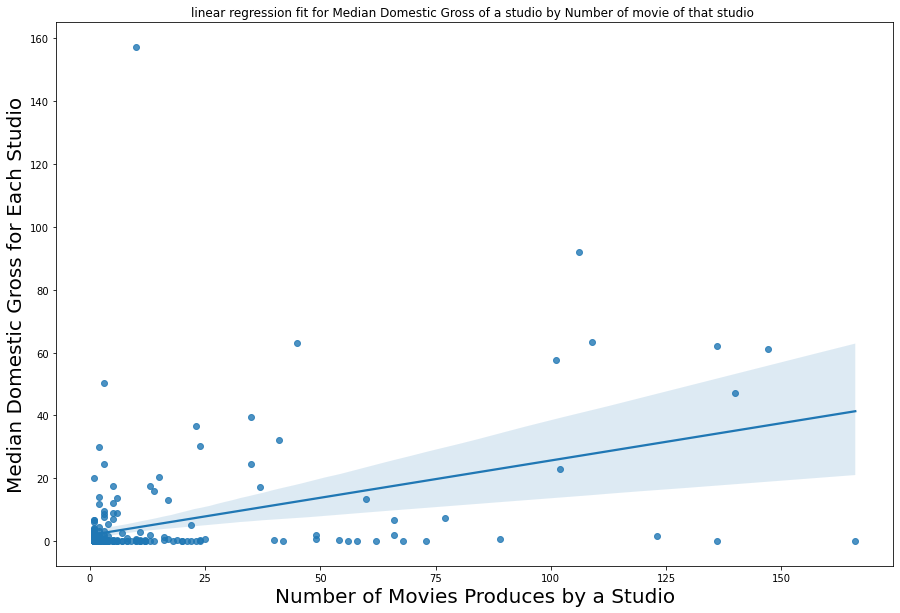

In [20]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15,10))

x=grouped_studio_df['count']
y=grouped_studio_df['median']/1000000

# Plot regression plot
sns.regplot(x=x,y=y)

#Set a title for the Axes
ax.set_title('linear regression fit for Median Domestic Gross of a studio by Number of movie of that studio ')

#Set the label for the x-axis
ax.set_xlabel('Number of Movies Produces by a Studio', fontsize=20)

#Set the label for the y-axis
ax.set_ylabel('Median Domestic Gross for Each Studio', fontsize=20)


# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x' )

# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

  This scatter plot did not show the coloration between studios and the domestic gross of movies. Since there are more than 255 different studios in this dataframe we can filter studios based on the domestic gross or the number of movies they produced. By filtering data based on the number of movies we might lose some data about new companies or successful companies with a lower number of movies. To investigate more detail we can limit our data to the 35 first sorted studios with higher domestic gross.

In [21]:
# Sort by the values along either axis
sorted_grouped_studio_df = grouped_studio_df.sort_values('normalized_data',ascending=False).head(35)

# To view a small sample of DataFrame object
sorted_grouped_studio_df.head(5)

,studio,sum,count,mean,median,normalized_data
36,BV,-2147483648,106,173764426,92100000,173764426
170,P/DW,1682900000,10,168290000,157250000,168290000
245,WB (NL),-2147483648,45,88793333,63100000,88793333
236,Uni.,-2147483648,147,87771380,61000000,87771380
244,WB,-2147483648,140,86914614,47250000,86914614


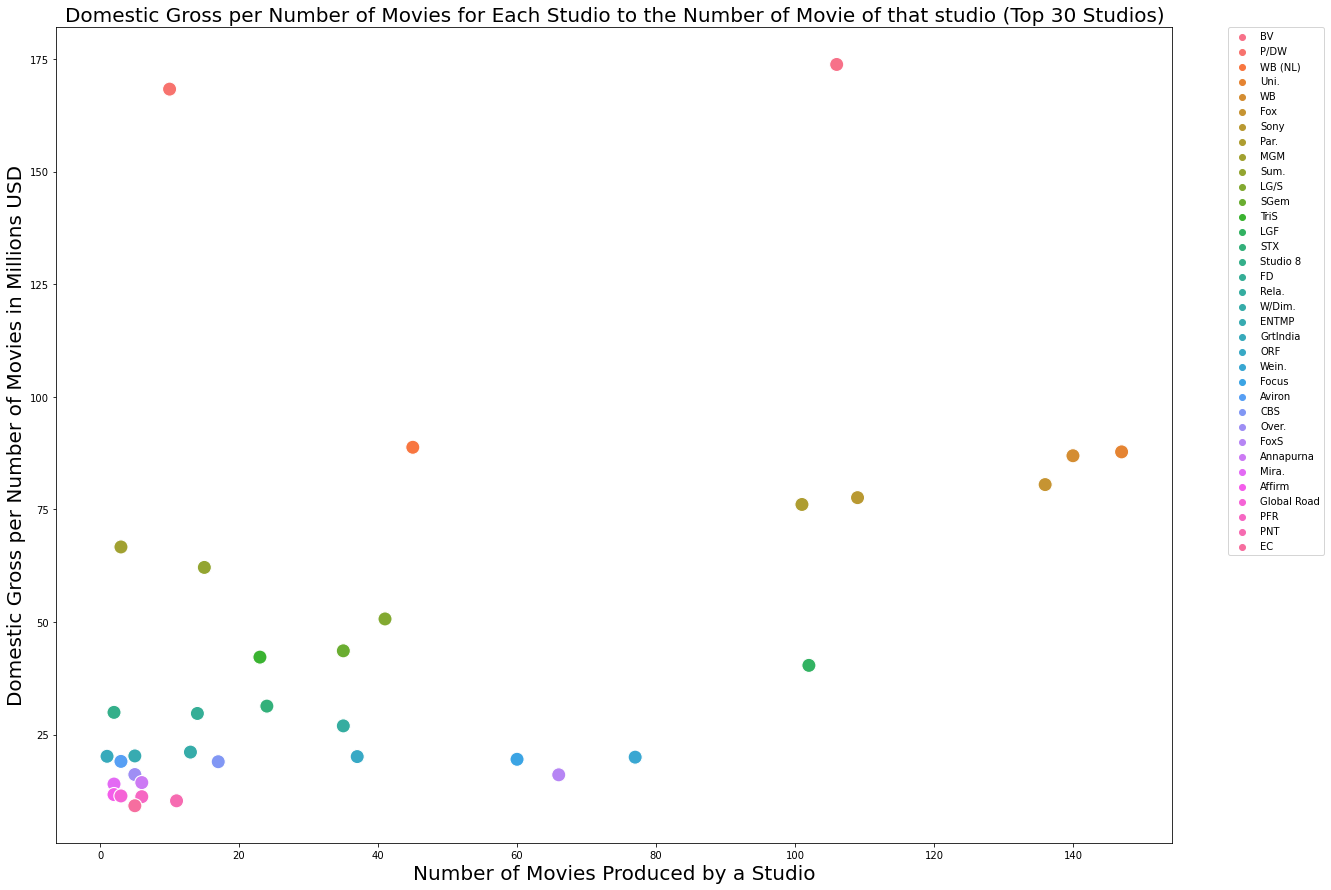

In [22]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20,15))

x=sorted_grouped_studio_df['count']
y=sorted_grouped_studio_df['normalized_data']/1000000
z =sorted_grouped_studio_df['studio']
sns.scatterplot(x=x,y=y, hue=z,s=200)

#Set a title for the Axes
plt.title('Domestic Gross per Number of Movies for Each Studio to the Number of Movie of that studio (Top 30 Studios)',
         fontsize=20)

#Set the label for the x-axis
plt.xlabel('Number of Movies Produced by a Studio', fontsize=20)

#Set the label for the y-axis
plt.ylabel('Domestic Gross per Number of Movies in Millions USD', fontsize=20)

# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x' )
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Show the plot
plt.show()

At first sight on the sorted data frame base on the domestic gross we might assume that BV studio produce high domestic gross movie and so the studio has a impact on the domestic gross of movies. But by normalizing the domestic gross with the number of movie that each studio produce and plot the scatter plot we realised that there is not a positive correlation between movies produced by different studio in their domestic gross. we can concluted that studio does not effect on domestic gross of movies.
We can also try boxplot to investigate the impact of studios on domestic gross of movies. The boxplot can show with more clarity the minimum and maximum gross values of each studio.  For that we created new datafram that had information of 10 top studios in gross.

In [23]:
# To view a small sample of DataFrame object
sorted_grouped_studio_df.head(10)

,studio,sum,count,mean,median,normalized_data
36,BV,-2147483648,106,173764426,92100000,173764426
170,P/DW,1682900000,10,168290000,157250000,168290000
245,WB (NL),-2147483648,45,88793333,63100000,88793333
236,Uni.,-2147483648,147,87771380,61000000,87771380
244,WB,-2147483648,140,86914614,47250000,86914614
93,Fox,-2147483648,136,80511029,62150000,80511029
213,Sony,-2147483648,109,77611771,63500000,77611771
183,Par.,-2147483648,101,76097729,57700000,76097729
140,MGM,200000000,3,66666666,50300000,66666666
217,Sum.,931871000,15,62124733,20400000,62124733


In [24]:
#seperate rwos include specific studios
top_10_studio = cleaned_movie_gross_df.loc[movie_gross_df['studio'].isin(['BV','P/DW','WB (NL)','Uni.','WB','Fox','Sony','Par.','MGM','Sum.'])]

top_10_studio

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000,2010
1,Alice in Wonderland (2010),BV,334200000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,2010
3,Inception,WB,292600000,2010
4,Shrek Forever After,P/DW,238700000,2010
...,...,...,...,...
3263,The Front Runner,Sony,2000000,2018
3264,2001: A Space Odyssey (2018 re-release),WB,3200000,2018
3289,Schindler's List (2018 re-release),Uni.,833000,2018
3369,Loving Pablo,Uni.,22000,2018


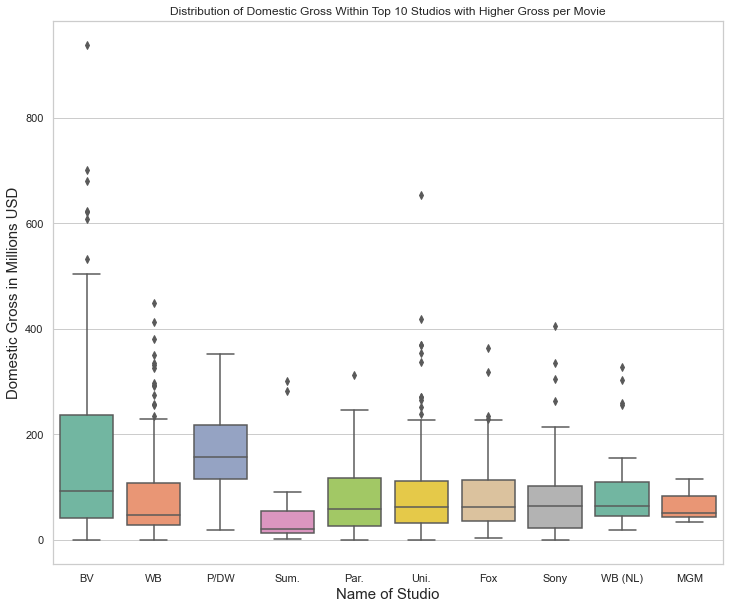

In [25]:
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12, 10))
# Draw a seaborn boxplot based on studio and domestic gross
sns.set(style="whitegrid")
sns.boxplot(x=top_10_studio['studio'],
            y=top_10_studio['domestic_gross']/1000000, palette="Set2")
# Set title of plot
plt.title('Distribution of Domestic Gross Within Top 10 Studios with Higher Gross per Movie')
# Set x-axis label and font size
plt.xlabel('Name of Studio', fontsize=15)
# Set y-axis label
plt.ylabel('Domestic Gross in Millions USD',fontsize=15)
# Remove scientific notation from y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

The median grosses of most studios are around 50 million dollars while having broader IQRs. Most studios appear to share the same minimum value, while BV studio has a much higher maximum with a few high outliers. Among these studios, P/DW with a higher median showed better results.

## Asking Analytical Questions and Visualizations

The most important step in exploratory data analysis is  to ask analytical questions and visualiz them. The main point is to ask questions related to independent variables and the target variable. 

## Qestion 1;  Which Genres need more budget and create more gross?

To investigate the relationship among movie genre, production budget and gross , we should combine dataframes that have this data. By looking at the rt_movie_info_df and rt_reviews_df dataframes we can see there are no mutual column that we can use to join the dataframes on them. movie_budgets_df has information about budget and gross but it does not have genres of movies. We should check the other dataframes we have for more information.

### Cleaning Movie Budget Datafram

In [26]:
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv.gz")

In [27]:
# Print a concise summary of a DataFrame
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
movie_budgets_df.duplicated(subset=['movie','production_budget','domestic_gross']).sum()

0

As we can see from the movioe budguets datafram information and .duplicated() method, this datafram does not have a null and duplicated value but the problem is some columns we expect to be integers are strings. To do the data analysis we need to chande the data type to integar.

In [29]:
# remove extra charater from columns values to change their type
movie_budgets_df['production_budget']= movie_budgets_df['production_budget'].str.replace ('$','').str.replace (',','').str.strip()
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace ('$','').str.replace (',','')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace ('$','').str.replace (',','')


In [30]:
#change the type of these columns to an integer
movie_budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']] = movie_budgets_df[[
    'production_budget', 'domestic_gross', 'worldwide_gross']].apply(pd.to_numeric)

BY looking to the datafram info we can see that  release_date is a pandas object dtype and its better to change it datetime with pd.to_datetime() method.

In [31]:
#Change the type of release_date to datetime
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

In [32]:
# Print a concise summary of a DataFrame
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


Throgh this datafram we can investiaget that is there a correlation between the budgute and gross? 
At first we can filter 100 movies with higher production budget and then check if there is a positive correlation between the budget and the movie gross

In [33]:
# Sort by the values along either axis
top_movie_budgets_df = movie_budgets_df.sort_values(['production_budget'],ascending=False).head(100)

# To view a small sample of DataFrame object
top_movie_budgets_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


By ploting production budget versus worldwide gross we would have a glance to our data

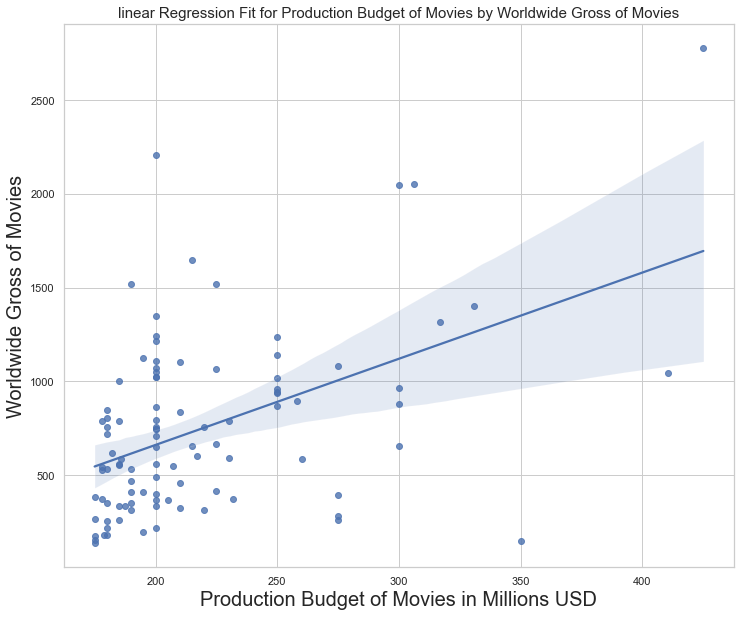

In [34]:
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12, 10))
x=top_movie_budgets_df['production_budget']/1000000
y=top_movie_budgets_df['worldwide_gross']/1000000 
sns.regplot(x=x,y=y)

plt.title('linear Regression Fit for Production Budget of Movies by Worldwide Gross of Movies',fontsize=15)
# Set y-axis label and fontsize
plt.ylabel('Worldwide Gross of Movies', fontsize=20)
# Set x-axis label and fontsize
plt.xlabel('Production Budget of Movies in Millions USD', fontsize=20)
# Change x-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='x' )
# Change y-axis ticks from scientific notation to integers
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

AS it can be see in the above graph, there is not a postive correlation between production budget and the gross of movies.Now we can join two dataframs to extract information about genres, production budget and gross. At first we should clean and prepare dataframes to join. 

### 6. imbd database

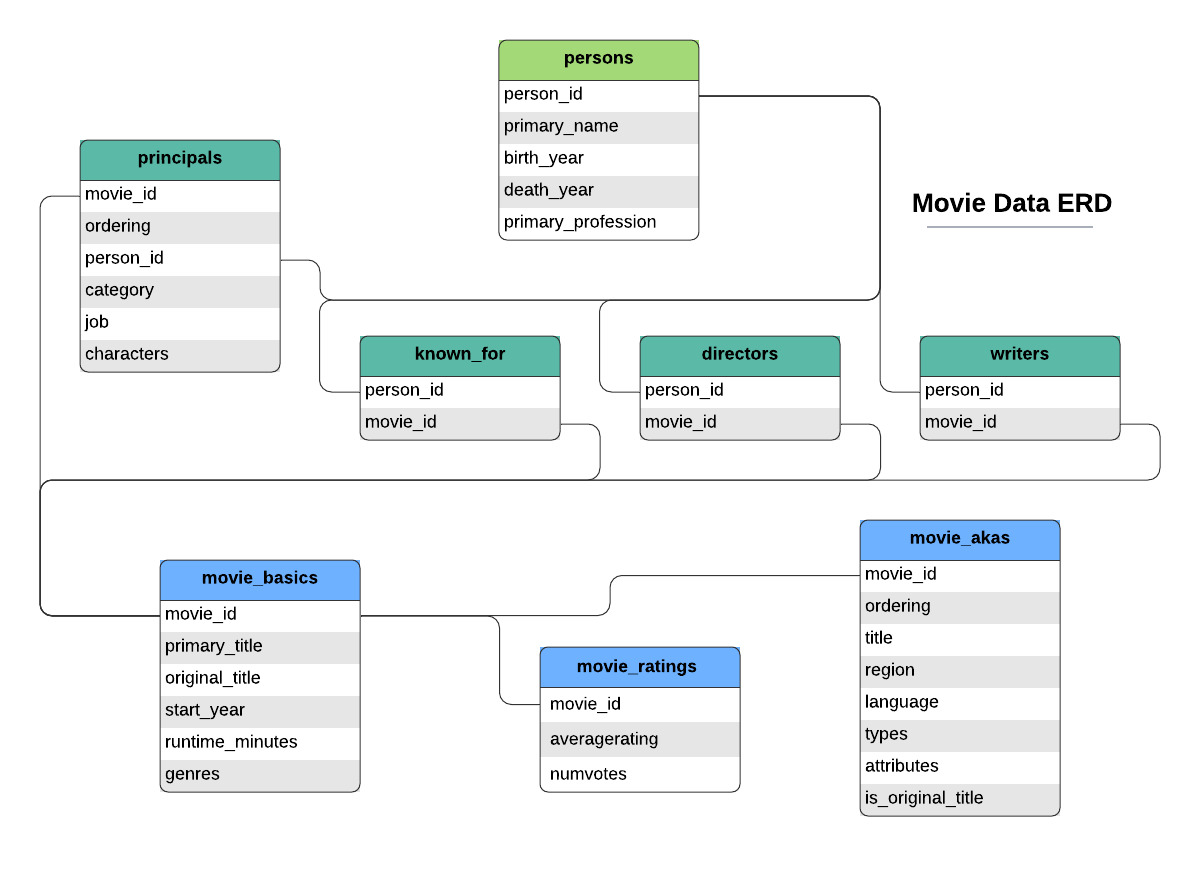

im.db has 8 dataframes and the above figure shows the attributes on each datframe. It seems movie_basics has the information that we are looking for.The imbd database is a sql file and we need to open it in panads. we can do it through sqlite3 library. 

In [35]:
# Check the titel of tables in a sql file
import sqlite3 
con = sqlite3.connect('im.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [36]:
# Read SQL query or database table into a DataFrame.
imdb_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", con)

# Print a concise summary of a DataFrame
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


imdb_basics_df provides the information about genres of movies and movie_budgets_df provides information about the budget and gross. Since theimdb_basics_df table has a primary_title and original_title columns, we can use these mutual columns to join this table with the budget table. Primary_title is the one that we use to join tables on that. At first, we should clean this table from missing values and duplicated rows.

In [37]:
# Detect missing values.
imdb_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Then we should determine what percentage of columns is null to make a decision. We use the null_per function that defines before. 

In [38]:
# Using the define function to calculate the percentage of null values
original_title_null_per = null_per( imdb_basics_df['original_title'], imdb_basics_df)
print ('The percentage of missing original_title value is {}%.'.format(round(original_title_null_per,2)))

# Using the define function to calculate the percentage of null values
runtime_minutes_null_per = null_per( imdb_basics_df['runtime_minutes'], imdb_basics_df)
print ('The percentage of missing runtime_minutes value is {}%.'.format(round(runtime_minutes_null_per,2)))

# Using the define function to calculate the percentage of null values
genres_null_per = null_per(imdb_basics_df['genres'],imdb_basics_df)
print ('The percentage of missing genres value is {}%.'.format(round(genres_null_per,2)))

The percentage of missing original_title value is 0.01%.
The percentage of missing runtime_minutes value is 21.72%.
The percentage of missing genres value is 3.7%.


Since we want to use the primary_title we can drop the original_title column. The percentage of missing genres is 3.7% so we can drop the null values. The runtime_minutes have a high percentage of missing values and we should not drop the null values. Since most movies have an average runtime, we can calculate the mean of runtimes and replace it with null values. 

In [39]:
#Drop specified labels from rows or columns
cleaned_imdb_basics_df = imdb_basics_df.drop('original_title',1)

# To view a small sample of DataFrame object
cleaned_imdb_basics_df.head(5)

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
# Remove missing values in a certain column
cleaned_imdb_basics_df = cleaned_imdb_basics_df.dropna(subset= ['genres'])

The runtime_minutes is pandas float data type. It is better to change it to an integer with .astype() method.

In [41]:
# Replace null value in runtime_minutes colum with mean of runtime values
cleaned_imdb_basics_df['runtime_minutes'].fillna(value=cleaned_imdb_basics_df['runtime_minutes'].mean(), inplace=True)

In [42]:
#Chnag the data types to the specified type
cleaned_imdb_basics_df['runtime_minutes'] = cleaned_imdb_basics_df['runtime_minutes'].astype(int)

In [43]:
# Detect missing values.
cleaned_imdb_basics_df.isnull().sum()

movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In the second step, we should check the duplications.

In [44]:
# check the duplications
cleaned_imdb_basics_df.duplicated(subset=['start_year','primary_title','genres','runtime_minutes']).sum()

122

In [45]:
# drop the duplicated rows
cleaned_imdb_basics_df = cleaned_imdb_basics_df.drop_duplicates(subset=['start_year','primary_title','genres','runtime_minutes'])

In [46]:
# check the duplications
cleaned_imdb_basics_df.duplicated(subset=['start_year','primary_title','genres','runtime_minutes']).sum()

0

Before joining the dataframes we should have a mutual column name so we changed the 'primary_title' name to the 'movie' that we had in the 'movie_budgets_df' dataframe. 

In [47]:
# change the colum name
cleaned_imdb_basics_df.rename(columns={'primary_title':'movie'},inplace=True)

# To view a small sample of DataFrame object
cleaned_imdb_basics_df.head(5)

,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,2018,86,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy"


In [48]:
# Merge dataframes on mutual column
Joined_imdb_budget_df = pd.merge(movie_budgets_df, cleaned_imdb_basics_df, on='movie')

# Print a concise summary of a DataFrame
print(Joined_imdb_budget_df.info())

# To view a small sample of DataFrame object
Joined_imdb_budget_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 0 to 3737
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 3738 non-null   int64         
 1   release_date       3738 non-null   datetime64[ns]
 2   movie              3738 non-null   object        
 3   production_budget  3738 non-null   int64         
 4   domestic_gross     3738 non-null   int64         
 5   worldwide_gross    3738 non-null   int64         
 6   movie_id           3738 non-null   object        
 7   start_year         3738 non-null   int64         
 8   runtime_minutes    3738 non-null   int32         
 9   genres             3738 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 306.6+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,"Action,Adventure,Sci-Fi"


After joining the dataframes we should check the existence of duplications and drop these duplications. 

In [49]:
# check for duplications
Joined_imdb_budget_df.duplicated(subset=['production_budget','release_date','movie']).sum()

1375

In [50]:
#drop duplicated rows
Joined_imdb_budget_df.drop_duplicates(subset=['production_budget','release_date','movie'],inplace=True)

In [51]:
# check for duplications
Joined_imdb_budget_df.duplicated(subset=['production_budget','release_date','movie']).sum()

0

In [52]:
# Print a concise summary of a DataFrame
Joined_imdb_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 3737
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2363 non-null   int64         
 1   release_date       2363 non-null   datetime64[ns]
 2   movie              2363 non-null   object        
 3   production_budget  2363 non-null   int64         
 4   domestic_gross     2363 non-null   int64         
 5   worldwide_gross    2363 non-null   int64         
 6   movie_id           2363 non-null   object        
 7   start_year         2363 non-null   int64         
 8   runtime_minutes    2363 non-null   int32         
 9   genres             2363 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 193.8+ KB


To answer the first question. We should categorize movies based on their genres and then compare the ratio of budget to gross for each genre. As we can see in the join table, each movie might have more than one genre. Since each movie is known by one genre, we select the first genre as the main genre.

To create a column with the main genre, at first we need to split the items in this column.

In [53]:
# Split the item in geres row and creat a row for each item
Joined_imdb_budget_df['genres'] = Joined_imdb_budget_df['genres'].str.split(',')
Joined_imdb_budget_df = Joined_imdb_budget_df.explode('genres')

# To view a small sample of DataFrame object
Joined_imdb_budget_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Adventure
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Fantasy
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action


In [54]:
# Print a concise summary of a DataFrame
Joined_imdb_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 3737
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5457 non-null   int64         
 1   release_date       5457 non-null   datetime64[ns]
 2   movie              5457 non-null   object        
 3   production_budget  5457 non-null   int64         
 4   domestic_gross     5457 non-null   int64         
 5   worldwide_gross    5457 non-null   int64         
 6   movie_id           5457 non-null   object        
 7   start_year         5457 non-null   int64         
 8   runtime_minutes    5457 non-null   int32         
 9   genres             5457 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 447.6+ KB


To have the first genres for each movie, we should delete the duplicates that were created after using .explode() method.

In [55]:
# Check the duplications
Joined_imdb_budget_df.duplicated(subset=['production_budget','release_date','movie']).sum()

3094

In [56]:
# Drop the dulpications
Joined_imdb_budget_df =Joined_imdb_budget_df.drop_duplicates(subset=['production_budget','release_date','movie'])

In [57]:
# Check the duplications
Joined_imdb_budget_df.duplicated(subset=['production_budget','release_date','movie']).sum()

0

In [58]:
# Print a concise summary of a DataFrame
Joined_imdb_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 3737
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2363 non-null   int64         
 1   release_date       2363 non-null   datetime64[ns]
 2   movie              2363 non-null   object        
 3   production_budget  2363 non-null   int64         
 4   domestic_gross     2363 non-null   int64         
 5   worldwide_gross    2363 non-null   int64         
 6   movie_id           2363 non-null   object        
 7   start_year         2363 non-null   int64         
 8   runtime_minutes    2363 non-null   int32         
 9   genres             2363 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 193.8+ KB


It seems there are mistakes in the genre data. Avatar is not a horror movie, and Titanic is not an adventure movie. We should change them to Sci-Fi and Drama respectly.

In [59]:
# Change the value in certain coulmn
Joined_imdb_budget_df.at[Joined_imdb_budget_df['movie']=='Avatar','genres']= 'Sci-Fi'

In [60]:
# Change the value in certain coulmn
Joined_imdb_budget_df.at[Joined_imdb_budget_df['movie']=='Titanic','genres']= 'Drama'

In [61]:
# Sort by the values along either axis
sort_budget = Joined_imdb_budget_df.sort_values('production_budget',ascending=False)

In [62]:
# group the datafram by genres
grouped_budget = sort_budget.groupby('genres')['production_budget'].agg(['sum','count'],as_index =False)

grouped_budget

,sum,count
genres,,
Action,38894074938,562
Adventure,14055299106,202
Animation,1058777247,23
Biography,3259816000,150
Comedy,8576677173,422
Crime,2699928785,123
Documentary,2581703000,139
Drama,9949352723,511
Family,28100000,7


In [63]:
# Normalize budget with count of movie
normalized_to_count = ((grouped_budget ['sum']/grouped_budget ['count'])/1000000)
grouped_budget ['normalized_to_count'] = normalized_to_count

# Sort by the values along either axis
grouped_budget= grouped_budget.sort_values(['normalized_to_count'],ascending=False)

#Reset the index, or a level of it
grouped_budget.reset_index(drop=True)

,sum,count,normalized_to_count
0,14055299106,202,69.580689
1,693520000,10,69.352000
2,38894074938,562,69.206539
3,156000000,3,52.000000
4,1058777247,23,46.033793
5,73000000,2,36.500000
6,200350000,7,28.621429
7,140500000,5,28.100000
8,134625000,5,26.925000
9,2699928785,123,21.950641


In [64]:
# Sort by the values along either axis
world_wide_gross = Joined_imdb_budget_df.sort_values(['worldwide_gross'],ascending=False)

# To view a small sample of DataFrame object
world_wide_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi
40,43,1997-12-19,Titanic,200000000,659363944,2208208395,tt2495766,2012,86,Drama
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action
25,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,tt0369610,2015,124,Action
65,67,2015-04-03,Furious 7,190000000,353007020,1518722794,tt2820852,2015,137,Action


In [65]:
# Group datafram based on certain column and reset the index, or a level of it
grouped_world_gross = world_wide_gross.groupby('genres')['worldwide_gross'].agg(['sum','count']).reset_index()

# To view a small sample of DataFrame object
grouped_world_gross.head()

,genres,sum,count
0,Action,115071385455,562
1,Adventure,47567145906,202
2,Animation,4487023424,23
3,Biography,9567984585,150
4,Comedy,24511432499,422


In [66]:
# Normalize budget with number of movie
normalized_g_to_count = ((grouped_world_gross ['sum']/grouped_world_gross ['count'])/1000000)
grouped_world_gross ['normalized_g_to_count'] = normalized_g_to_count

# Sort by the values along either axis
grouped_world_gross= grouped_world_gross.sort_values(['normalized_g_to_count'],ascending=False)

#Reset the index, or a level of it
grouped_world_gross.reset_index(drop=True)

,genres,sum,count,normalized_g_to_count
0,Sci-Fi,3641809885,10,364.180989
1,Adventure,47567145906,202,235.480920
2,Action,115071385455,562,204.753355
3,Animation,4487023424,23,195.087975
4,Musical,908910994,5,181.782199
5,War,431922678,3,143.974226
6,Mystery,817289648,7,116.755664
7,Biography,9567984585,150,63.786564
8,Comedy,24511432499,422,58.083963
9,Drama,27781836733,511,54.367587


In [67]:
# Merge dataframes on mutual column
Joined_sum_df = pd.merge(grouped_budget, grouped_world_gross, on='genres')

#Chnag the data types to the specified type
Joined_sum_df['normalized_to_count'] = Joined_sum_df['normalized_to_count'].astype(int)

#Chnag the data types to the specified type
Joined_sum_df['normalized_g_to_count'] = Joined_sum_df['normalized_g_to_count'].astype(int)
Joined_sum_df

,genres,sum_x,count_x,normalized_to_count,sum_y,count_y,normalized_g_to_count
0,Adventure,14055299106,202,69,47567145906,202,235
1,Sci-Fi,693520000,10,69,3641809885,10,364
2,Action,38894074938,562,69,115071385455,562,204
3,War,156000000,3,52,431922678,3,143
4,Animation,1058777247,23,46,4487023424,23,195
5,Sport,73000000,2,36,78342894,2,39
6,Mystery,200350000,7,28,817289648,7,116
7,Musical,140500000,5,28,908910994,5,181
8,Romance,134625000,5,26,157757069,5,31
9,Crime,2699928785,123,21,5927729716,123,48


In [68]:
#Drop specified labels from rows or columns
clean_Joined_sum_df = Joined_sum_df.drop(['sum_x','count_x','sum_y','count_y'],axis=1)

clean_Joined_sum_df = clean_Joined_sum_df [['genres','normalized_g_to_count','normalized_to_count']]

# To view a small sample of DataFrame object
clean_Joined_sum_df.head()

,genres,normalized_g_to_count,normalized_to_count
0,Adventure,235,69
1,Sci-Fi,364,69
2,Action,204,69
3,War,143,52
4,Animation,195,46


In [69]:
# Unpivot a DataFrame from wide to long format
columns = ['genres','normalized_g_to_count','normalized_to_count']
test_data_melted = pd.melt(clean_Joined_sum_df, id_vars=columns[0],\
                           var_name="Parameters", value_name="US Million Dollars")

# To view a small sample of DataFrame object
test_data_melted.head(2)

,genres,Parameters,US Million Dollars
0,Adventure,normalized_g_to_count,235
1,Sci-Fi,normalized_g_to_count,364


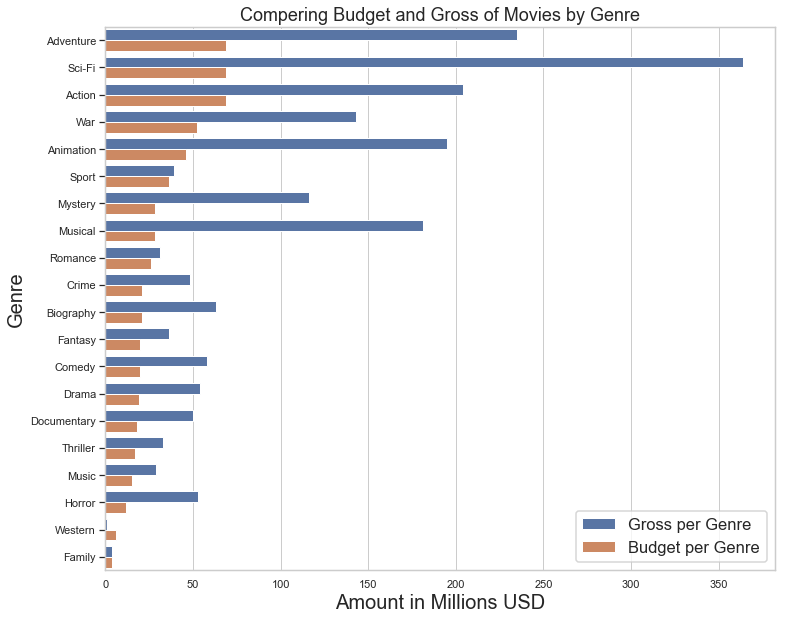

In [70]:
# Create a plot and size it appropriately for information shown
fig, ax1 = plt.subplots(figsize=(12,10))
# Change the ticklabel format
ax1.ticklabel_format(useOffset=False, style='plain')
# Draw the seaborn barplot

g = sns.barplot(y=columns[0], x="US Million Dollars", hue="Parameters",\
                data=test_data_melted, ax=ax1)
ax2 = ax1.twinx()



# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")

ax2.axes.get_yaxis().set_ticks([])

# Set the barplot's title.
plt.title('Compering Budget and Gross of Movies by Genre')
# Set the y lable.
ax1.set_ylabel('Genre',fontsize=20)
ax1.set_xlabel ('Amount in Millions USD',fontsize=20)
# Label the legend
labels = ['Gross per Genre', 'Budget per Genre']
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, labels)

plt.show()

As it can be seen in the plot, for each genre the budget and gross are different and more budgets do not guarantee more gross. To complete our view on the role of the genre we can show each genre earns more net income.  

In [71]:
# To view a small sample of DataFrame object
Joined_sum_df.head(3)

,genres,sum_x,count_x,normalized_to_count,sum_y,count_y,normalized_g_to_count
0,Adventure,14055299106,202,69,47567145906,202,235
1,Sci-Fi,693520000,10,69,3641809885,10,364
2,Action,38894074938,562,69,115071385455,562,204


In [72]:
# calculate net income
net_income = ((Joined_sum_df['normalized_g_to_count'])- (Joined_sum_df['normalized_to_count']))

#Joined_sum_df ['net_income'] = net_income
Joined_sum_df['net_income'] =net_income

# Sort by the values along either axis
net_income = Joined_sum_df.sort_values('net_income',ascending=False)

# To view a small sample of DataFrame object
net_income.head()

,genres,sum_x,count_x,normalized_to_count,sum_y,count_y,normalized_g_to_count,net_income
1,Sci-Fi,693520000,10,69,3641809885,10,364,295
0,Adventure,14055299106,202,69,47567145906,202,235,166
7,Musical,140500000,5,28,908910994,5,181,153
4,Animation,1058777247,23,46,4487023424,23,195,149
2,Action,38894074938,562,69,115071385455,562,204,135


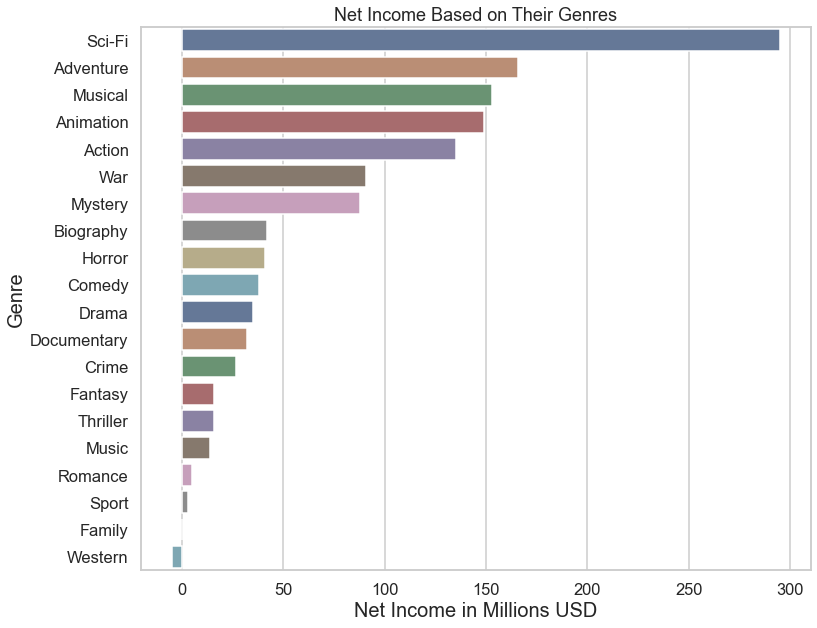

In [73]:
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = net_income['genres'], x = net_income['net_income'], saturation = 0.5, palette="deep")
# Set the barplot's title.
plt.title('Net Income Based on Their Genres')
# Label the y-axis
plt.ylabel('Genre', fontsize=20)
# Label the x-axis
plt.xlabel('Net Income in Millions USD', fontsize=20)

# Show the plot                
plt.show()

To have a better sight we could select 100 top gross movies  and check which genres was more successful in different budget range. 

In [74]:
# Sort by the values along either axis and select 100 first on the table
Top_100_gross = Joined_imdb_budget_df.sort_values(['worldwide_gross','production_budget'],ascending=[False,False])[:100]

# To view a small sample of DataFrame object
Top_100_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi
40,43,1997-12-19,Titanic,200000000,659363944,2208208395,tt2495766,2012,86,Drama
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action
25,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,tt0369610,2015,124,Action
65,67,2015-04-03,Furious 7,190000000,353007020,1518722794,tt2820852,2015,137,Action


In [75]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values
Top_100_gross.describe()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,43.780000,1.712950e+08,3.139765e+08,9.039443e+08,2014.340000,120.910000
std,27.189414,7.123205e+07,1.331765e+08,3.574025e+08,2.610081,23.372303
min,1.000000,2.000000e+07,1.249870e+08,5.610721e+08,2010.000000,50.000000
25%,22.000000,1.292500e+08,2.210581e+08,6.550070e+08,2012.000000,102.750000
50%,38.000000,1.700000e+08,2.863847e+08,7.995168e+08,2014.000000,123.500000
75%,62.000000,2.000000e+08,3.681451e+08,1.037462e+09,2017.000000,137.000000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2019.000000,169.000000


To determine the number of bins we can determine the difference between max and min values of the data and divide it by the square root of the number of data points.

In [76]:
# To change the scientific notation, we can use a lambda expression to 
# iterate thorugh each value within the result of the describe method 
# and show its plain format.
Top_100_gross['production_budget'].describe().apply(lambda x: format(x, 'f'))

count          100.000000
mean     171295000.000000
std       71232051.256879
min       20000000.000000
25%      129250000.000000
50%      170000000.000000
75%      200000000.000000
max      425000000.000000
Name: production_budget, dtype: object

The lowest budget for the top 100 grossing movies is 20 million dollars, with the highest amount being 425 million dollars. Budget ranges can be determined by dividing this range into bins of the appropriate size to show the most common range of production budget among the top 100 grossing. The number of bins was considered as 5.

In [77]:
# Determin production budget Bin Width 
budget_range = ((Top_100_gross['production_budget'].max()) - (Top_100_gross['production_budget'].min()))/5

budget_range

81000000.0

The bin width was determined 81 million dollars.

In [78]:
# Create a list of integers, including infinity defined by numpy.
bins = [20000000, 101000000, 182000000, 263000000, 344000000, np.inf]
# Create a name for the bins expressing the range for each bin.
names = ['20-101 million', '101-182 million',
         '182-263 million', '263-344 million', '344-425 million']
# Make a new categorical column names budget range, which is made of the 
# segments from the production budget column, 
Top_100_gross['budget_range'] = pd.cut(
    #cut at the bin values and label with the names list.
    Top_100_gross['production_budget'], bins=bins, labels=names)

# To view a small sample of DataFrame object
Top_100_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,budget_range
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi,344-425 million
40,43,1997-12-19,Titanic,200000000,659363944,2208208395,tt2495766,2012,86,Drama,182-263 million
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action,263-344 million
25,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,tt0369610,2015,124,Action,182-263 million
65,67,2015-04-03,Furious 7,190000000,353007020,1518722794,tt2820852,2015,137,Action,182-263 million


In [79]:
# Group datafram based on certain column and reset the index, or a level of it
group_budget = Top_100_gross.groupby(['budget_range','genres'])['worldwide_gross'].agg(['sum','count'])

# To view a small sample of DataFrame object
group_budget.head()

sum  count
budget_range   genres                      
20-101 million Action     2443445165      3
               Adventure  6629114125      7
               Animation   634454789      1
               Biography   894985342      1
               Comedy      586464305      1

In [80]:
# Normalize budget with number of movie 
normalized_data_gross = ((group_budget ['sum']/group_budget ['count'])/1000000).round()
group_budget ['normalized_data_gross'] = normalized_data_gross

# To view a small sample of DataFrame object
group_budget.head()

sum  count  normalized_data_gross
budget_range   genres                                             
20-101 million Action     2443445165      3                  814.0
               Adventure  6629114125      7                  947.0
               Animation   634454789      1                  634.0
               Biography   894985342      1                  895.0
               Comedy      586464305      1                  586.0

In [81]:
#Reset the index, or a level of it
group_budget = group_budget.reset_index()

# To view a small sample of DataFrame object
group_budget.head()

,budget_range,genres,sum,count,normalized_data_gross
0,20-101 million,Action,2443445165,3,814.0
1,20-101 million,Adventure,6629114125,7,947.0
2,20-101 million,Animation,634454789,1,634.0
3,20-101 million,Biography,894985342,1,895.0
4,20-101 million,Comedy,586464305,1,586.0


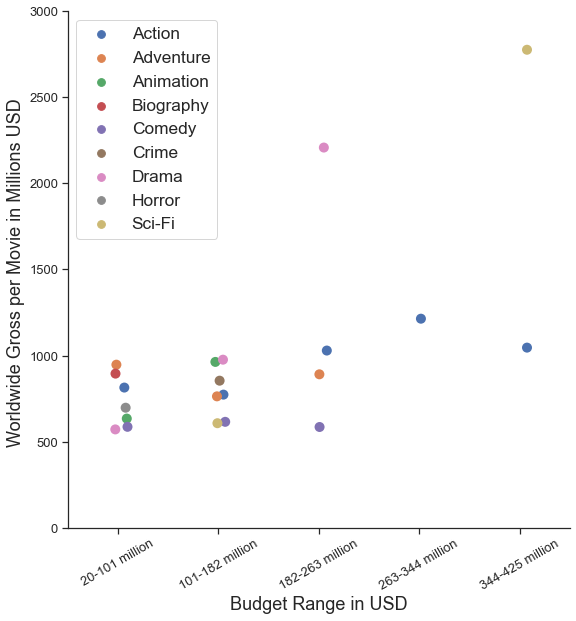

In [82]:

# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")

sns.set_theme(style="ticks")
# Create a plot and size it appropriately for information shown
g = sns.catplot(x="budget_range", y="normalized_data_gross", hue="genres", data=group_budget, height=8, aspect=1,s=10, legend=None)

g.set_xticklabels( rotation=30, fontsize= 13)
g.set_yticklabels(  fontsize= 13)
g.set_xlabels('Budget Range in USD',fontsize=18)
g.set_ylabels('Worldwide Gross per Movie in Millions USD ',fontsize=18);
plt.legend(fontsize='x-large', title_fontsize='40')

plt.show()

By Categorizing the budget deciding on choosing the genres based on the amount of budget is more logical. According to 'Budget Range Visualisation', higher than 344 million dollars sci-fi genres had more gross while for budget less than 263 million dollars drama genres created more gross. 

# Q2: What is the best release date based on genres and gross?

In [83]:
# To view a small sample of DataFrame object
Joined_imdb_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,Action
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action


According to the type of data in release_data we need to extract the months from the release_date column. 

In [84]:
# Return the month names of the Series or DatetimeIndex with specified locale.
Joined_imdb_budget_df['month_short'] = Joined_imdb_budget_df['release_date'].dt.month_name().str[:3]

# To view a small sample of DataFrame object
Joined_imdb_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,month_short
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,Action,May
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action,Apr


In [85]:
#Group DataFrame using a mapper or by a Series of columns.
grouped_month_df = Joined_imdb_budget_df.groupby('month_short')['worldwide_gross'].agg(['sum','count'])

In [86]:
grouped_month_df

,sum,count
month_short,,
Apr,17664717211,202
Aug,13661435866,192
Dec,32550069934,291
Feb,15672657307,162
Jan,9022088143,147
Jul,26936718149,179
Jun,34672037787,186
Mar,22116399617,200
May,27975383451,159


In [87]:
#Group DataFrame using a mapper or by a Series of columns.
grouped_month_df = Joined_imdb_budget_df.groupby('month_short')['worldwide_gross'].agg(['sum','count'])

To have a better sight we change the order of months.

In [88]:
# Conform Series/DataFrame to new index with optional filling logic
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_month_df = grouped_month_df.reindex(new_order, axis=0)

In [89]:
#Reset the index, or a level of it
grouped_month_df = grouped_month_df.reset_index()
grouped_month_df

,month_short,sum,count
0,Jan,9022088143,147
1,Feb,15672657307,162
2,Mar,22116399617,200
3,Apr,17664717211,202
4,May,27975383451,159
5,Jun,34672037787,186
6,Jul,26936718149,179
7,Aug,13661435866,192
8,Sep,11485118686,209
9,Oct,14433602195,232


In [90]:
# Normalize gross with number of movie
normalized_data = ((grouped_month_df ['sum']/grouped_month_df ['count'])/1000000).round()
grouped_month_df ['normalized_data'] = normalized_data

# To view a small sample of DataFrame object
grouped_month_df.head(5)

,month_short,sum,count,normalized_data
0,Jan,9022088143,147,61.0
1,Feb,15672657307,162,97.0
2,Mar,22116399617,200,111.0
3,Apr,17664717211,202,87.0
4,May,27975383451,159,176.0


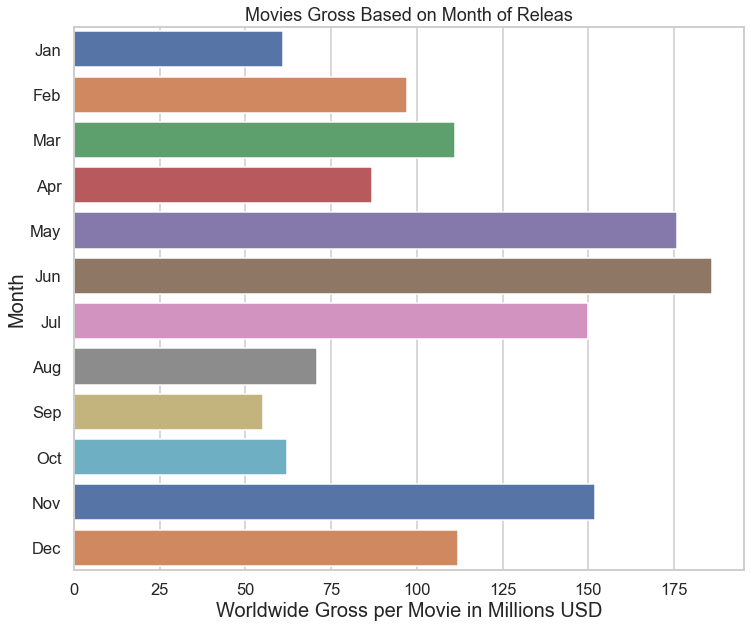

In [91]:
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
# Create a plot and size it appropriately for information shown
plt.figure(figsize=(12,10))
# Draw the seaborn barplot
sns.barplot(y = grouped_month_df['month_short'], x =grouped_month_df['normalized_data'], saturation = 0.8, palette="deep")
# Set the barplot's title.
plt.title('Movies Gross Based on Month of Releas')
# Label the y-axis
plt.ylabel('Month', fontsize=20)
# Label the x-axis
plt.xlabel('Worldwide Gross per Movie in Millions USD', fontsize=20)

# Show the plot                
plt.show()



This plot showed movies released in Jun, July, and May had more worldwide gross.Before deciding only on this plot we should check the genres diversity in differnt months. From  previous plot, we released that the worldwide higher gross genres were Sci-Fi, Adventure, Action, and Animation. We checked  diversity of these genres in different months.

In [92]:
#Group DataFrame using a mapper or by a Series of columns.
grouped_month_geners_df = Joined_imdb_budget_df.groupby(['month_short','genres'])['worldwide_gross'].agg(['count'])

# To view a small sample of DataFrame object
grouped_month_geners_df.head(20)

count
month_short genres            
Apr         Action          39
            Adventure       13
            Animation        1
            Biography       10
            Comedy          44
            Crime           12
            Documentary     12
            Drama           42
            Family           1
            Fantasy          1
            Horror          20
            Mystery          1
            Sci-Fi           3
            Thriller         2
            War              1
Aug         Action          52
            Adventure        8
            Animation        4
            Biography       13
            Comedy          31

In [93]:
#Reset the index, or a level of it
grouped_month_geners_df = grouped_month_geners_df.reset_index()
grouped_month_geners_df

,month_short,genres,count
0,Apr,Action,39
1,Apr,Adventure,13
2,Apr,Animation,1
3,Apr,Biography,10
4,Apr,Comedy,44
...,...,...,...
158,Sep,Horror,19
159,Sep,Music,1
160,Sep,Musical,1
161,Sep,Sport,1


In [94]:
#Whether each element in the DataFrame is contained in values
most_grouped_month_geners_df = grouped_month_geners_df.loc[grouped_month_geners_df['genres'].isin(['Action','Adventure','Animation','Sci-Fi'])]
most_grouped_month_geners_df

,month_short,genres,count
0,Apr,Action,39
1,Apr,Adventure,13
2,Apr,Animation,1
12,Apr,Sci-Fi,3
15,Aug,Action,52
16,Aug,Adventure,8
17,Aug,Animation,4
30,Dec,Action,60
31,Dec,Adventure,31
32,Dec,Animation,7


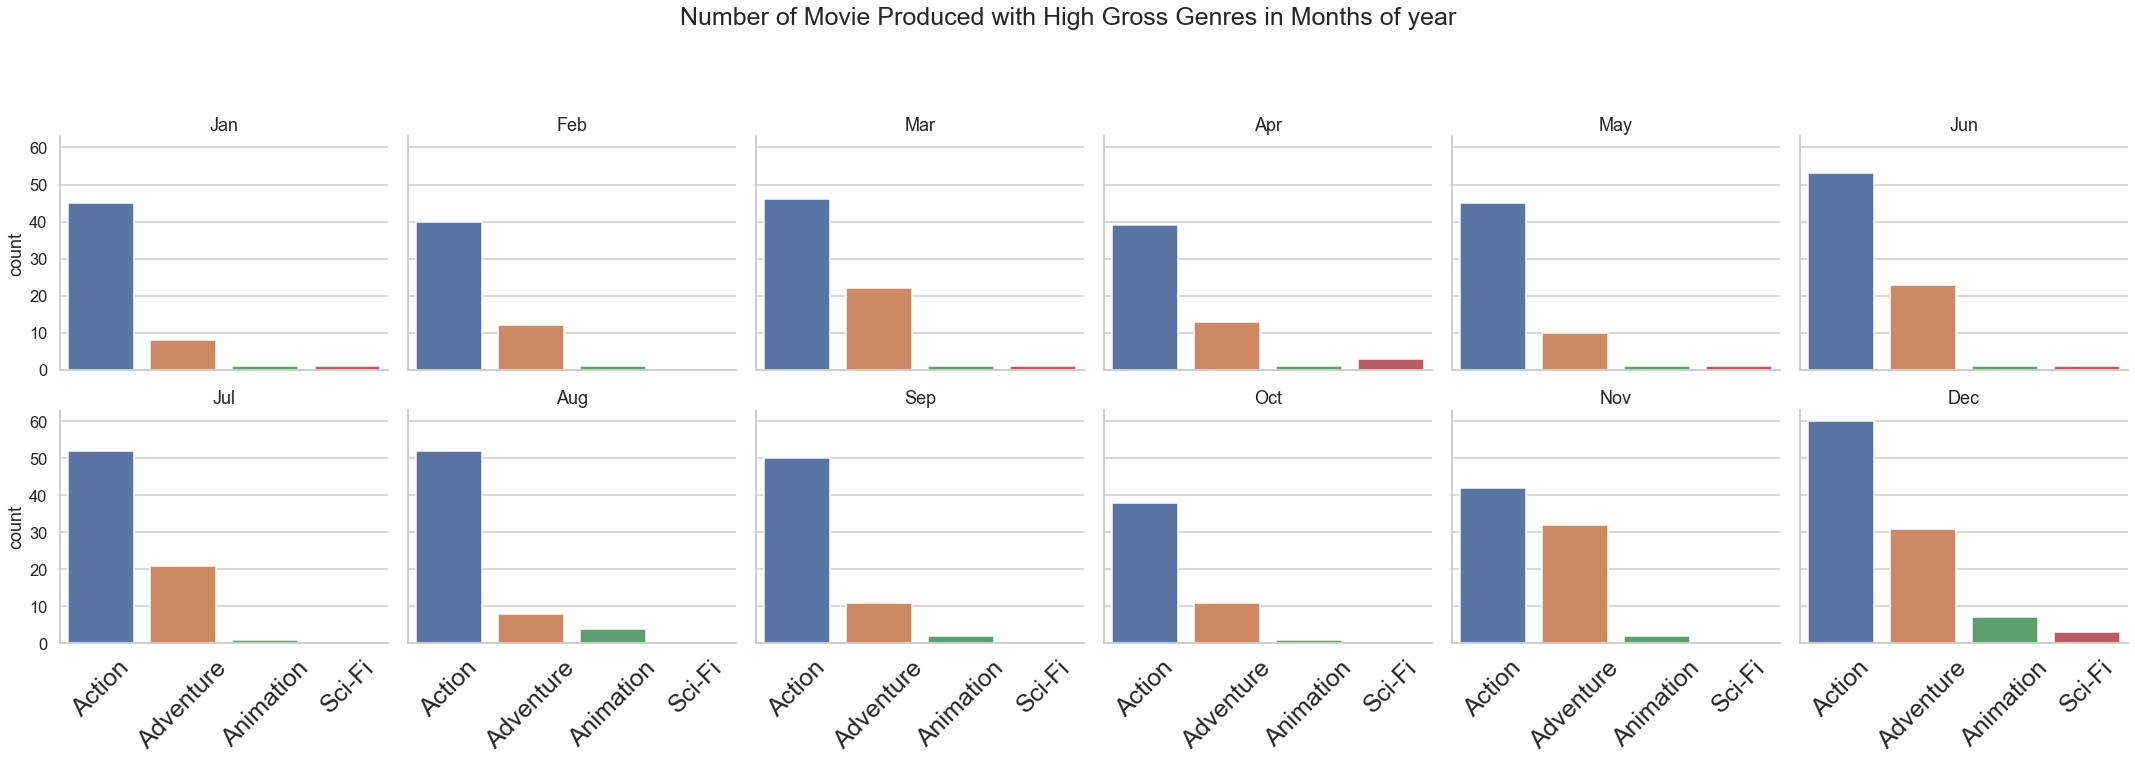

In [95]:
# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")
# Create a plot and size it appropriately for information shown

ax = sns.factorplot(x='genres', y='count', col='month_short', data=most_grouped_month_geners_df, kind='bar',
                    col_wrap=6, col_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



ax.set_xticklabels(['Action','Adventure','Animation','Sci-Fi'], rotation=45, fontsize= 25)
ax.set_xlabels(fontsize= 20)
ax.set_titles("{col_name}",fontsize= 25)
ax.fig.suptitle ('Number of Movie Produced with High Gross Genres in Months of year',fontsize= 25)
ax.fig.subplots_adjust(top=0.8)
ax.set_xlabels(' ');




 By taking a look at the number of movies released each month among high gross genres (Sci-Fi, Adventure, Action, and Animation) that showed in the 'Release Time by Gener Visualisation' it is clear that the number of the movies had an almost similar trend in every month. This plot confirmed the impact of releasing time on movie gross.

# Qestion 3 :  What is the perfect running time for a movie?  

In [96]:
# To view a small sample of DataFrame object
Joined_imdb_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,month_short
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,Action,May
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action,Apr


At first, we can check how run_minutes affects the production budget. For this purpose, we should prepare the running minutes range.

In [97]:
#generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values
Joined_imdb_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,2363.000000,2.363000e+03,2.363000e+03,2.363000e+03,2363.000000,2363.000000
mean,50.545070,3.600161e+07,4.541063e+07,1.088581e+08,2013.777825,100.898434
std,28.580116,4.955768e+07,7.653755e+07,2.110760e+08,2.689425,21.409831
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,2010.000000,1.000000
25%,26.000000,5.000000e+06,6.715510e+05,2.469408e+06,2011.000000,88.000000
50%,50.000000,1.800000e+07,1.849401e+07,3.119242e+07,2014.000000,99.000000
75%,75.000000,4.350000e+07,5.506668e+07,1.101152e+08,2016.000000,112.000000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2021.000000,180.000000


The top 100 movies with higher production budget were selected. 

In [98]:
# Sort by the values along either axis
top_100_budget = Joined_imdb_budget_df.sort_values('production_budget',ascending=False).head(100)
top_100_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,month_short
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,Action,May
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action,Apr
...,...,...,...,...,...,...,...,...,...,...,...
123,27,2010-05-21,Shrek Forever After,165000000,238736787,756244673,tt0892791,2010,93,Adventure,May
125,29,2014-11-07,Big Hero 6,165000000,222527828,652127828,tt2245084,2014,102,Action,Nov
138,39,2015-11-20,The Hunger Games: Mockingjay - Part 2,160000000,281723902,648986787,tt1951266,2015,137,Action,Nov
137,38,2010-07-16,Inception,160000000,292576195,835524642,tt1375666,2010,148,Action,Jul


In [99]:
#Generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values
top_100_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,44.290000,2.057370e+08,2.526181e+08,7.396027e+08,2014.470000,125.260000
std,28.976582,4.940297e+07,1.597853e+08,4.532776e+08,2.653205,20.617547
min,1.000000,1.600000e+08,3.836248e+07,1.396303e+08,2010.000000,64.000000
25%,20.500000,1.750000e+08,1.411725e+08,3.990541e+08,2012.000000,112.750000
50%,37.500000,1.900000e+08,2.289015e+08,6.611623e+08,2014.000000,128.000000
75%,68.250000,2.150000e+08,3.264151e+08,9.763918e+08,2017.000000,137.000000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2019.000000,169.000000


To determine the number of bins we can determine the difference between max and min values of the data and divide it by the square root of the number of data points.  running time minutes ranges can be determined by dividing this range into bins of the appropriate size to show the most common range of production budget among the top 100 grossing. The number of bins was considered as 6.

In [100]:
# Determin production budget Bin Width
runtime_range = ((top_100_budget['runtime_minutes'].max()) - (top_100_budget['runtime_minutes'].min()))/6
runtime_range

17.5

In [101]:
# Create a list of integers, including infinity defined by numpy.
mins = [50, 70, 90, 110, 130,150,170]
# Create a name for the bins expressing the range for each bin
groups = ['50-70 min', '70-90 min',
         '90-110 min', '110-130 min', '130-150 min','150-170 min']
# Make a nre categorical column range_minutes, which is made of the
# segments from the runtime_minutes column,
top_100_budget['range_minutes'] = pd.cut(
    # cut at the min values and label them with the groups list.
    top_100_budget['runtime_minutes'], bins=mins, labels=groups)

In [102]:
# To view a small sample of DataFrame object
top_100_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,start_year,runtime_minutes,genres,month_short,range_minutes
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,2011,93,Sci-Fi,Dec,90-110 min
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136,Action,May,130-150 min
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113,Action,Jun,110-130 min
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141,Action,May,130-150 min
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149,Action,Apr,130-150 min


In [103]:
#Group DataFrame using a mapper or by a Series of columns.
group_top_100_budget = top_100_budget.groupby('range_minutes')['production_budget'].agg(['sum','count'])
group_top_100_budget

,sum,count
range_minutes,,
50-70 min,175000000,1
70-90 min,593000000,3
90-110 min,4012500000,20
110-130 min,6287000000,33
130-150 min,7509200000,34
150-170 min,1997000000,9


In [104]:
# Normalize budget with number of movie and chnag the data types to the specified type
normalized_data_budget = (((group_top_100_budget ['sum']/group_top_100_budget ['count']))/1000000).astype(int)
group_top_100_budget ['normalized_data_budget'] = normalized_data_budget
group_top_100_budget

,sum,count,normalized_data_budget
range_minutes,,,
50-70 min,175000000,1,175
70-90 min,593000000,3,197
90-110 min,4012500000,20,200
110-130 min,6287000000,33,190
130-150 min,7509200000,34,220
150-170 min,1997000000,9,221


In [105]:
#Group DataFrame using a mapper or by a Series of columns.
group_top_100_gross = top_100_budget.groupby('range_minutes')['worldwide_gross'].agg(['sum','count'])
group_top_100_gross

,sum,count
range_minutes,,
50-70 min,962854547,1
70-90 min,3343897299,3
90-110 min,15277676251,20
110-130 min,19027045925,33
130-150 min,27663025194,34
150-170 min,7685769545,9


In [106]:
# Normalize gross with number of movie and chnag the data types to the specified type
normalized_data_gross = (((group_top_100_gross ['sum']/group_top_100_gross ['count']))/1000000).astype(int)
group_top_100_gross ['normalized_data_gross'] = normalized_data_gross
group_top_100_gross

,sum,count,normalized_data_gross
range_minutes,,,
50-70 min,962854547,1,962
70-90 min,3343897299,3,1114
90-110 min,15277676251,20,763
110-130 min,19027045925,33,576
130-150 min,27663025194,34,813
150-170 min,7685769545,9,853


In [107]:
# Merge dataframes on mutual column
Joined_budget_gross_df = pd.merge(group_top_100_budget, group_top_100_gross, on='range_minutes')
Joined_budget_gross_df

,sum_x,count_x,normalized_data_budget,sum_y,count_y,normalized_data_gross
range_minutes,,,,,,
50-70 min,175000000,1,175,962854547,1,962
70-90 min,593000000,3,197,3343897299,3,1114
90-110 min,4012500000,20,200,15277676251,20,763
110-130 min,6287000000,33,190,19027045925,33,576
130-150 min,7509200000,34,220,27663025194,34,813
150-170 min,1997000000,9,221,7685769545,9,853


In [108]:
#Reset the index, or a level of it
Joined_budget_gross_df = Joined_budget_gross_df.reset_index()

In [109]:
#Drop specified labels from rows or columns
Joined_budget_gross_df = Joined_budget_gross_df.drop(columns=['sum_x','count_x','sum_y','count_y'])

In [110]:
columns = ['range_minutes','normalized_data_budget','normalized_data_gross']
test_data_melted_m = pd.melt(Joined_budget_gross_df, id_vars=columns[0],\
                           var_name="Parameters", value_name="Amount in Millions USD")

# To view a small sample of DataFrame object
test_data_melted_m.head(2)

,range_minutes,Parameters,Amount in Millions USD
0,50-70 min,normalized_data_budget,175
1,70-90 min,normalized_data_budget,197


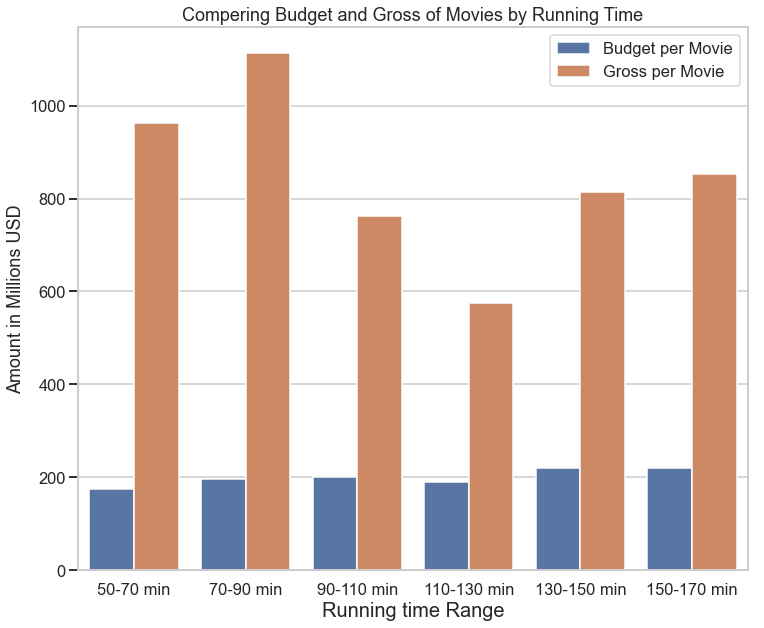

In [111]:
# Create a plot and size it appropriately for information shown
fig, ax1 = plt.subplots(figsize=(12,10))
# Change the ticklabel format
ax1.ticklabel_format(useOffset=False, style='plain')

# Draw the seaborn barplot
#g = sns.barplot(y=columns[0], x="US Million Dollars", hue="Parameters",\
                #data=test_data_melted_m, ax=ax1)

g = sns.barplot(y="Amount in Millions USD", x=columns[0], hue="Parameters",\
                data=test_data_melted_m, ax=ax1)
ax2 = ax1.twinx()


# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")

ax2.axes.get_yaxis().set_ticks([])

# Set the barplot's title.
plt.title('Compering Budget and Gross of Movies by Running Time')
# Set the y lable.
ax1.set_xlabel('Running Time Range',fontsize=20)
# Label the legend
g.legend( bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
labels = ['Budget per Movie', 'Gross per Movie']
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, labels)

plt.show()

Normally we assume the low budget movie are shorter. But according to fig.6 running time did not cause a trend in increasing the movie budget. On the other hand, longer movie did not resalt in higher gross. It seems movies with 70-90 minutes running time had higher gross.

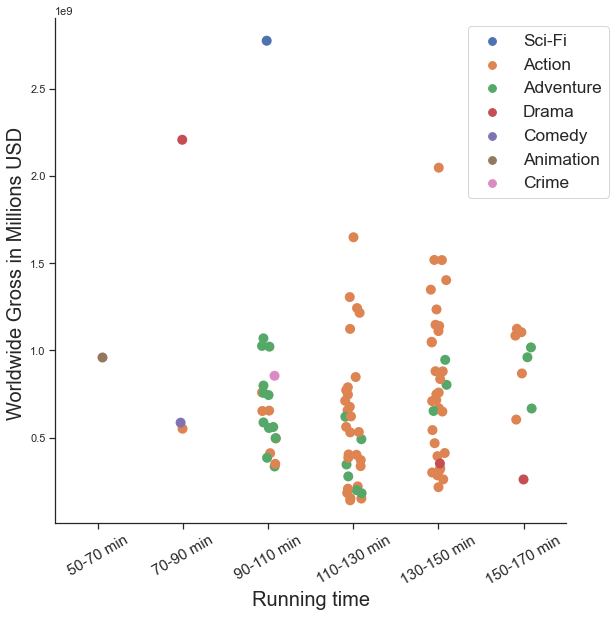

In [113]:

# Set the style of the seaborn plot to have a white background with gray lines. 
sns.set(style="whitegrid")
# Set the scale plot to be larger and easier to read.
sns.set_context("talk")

sns.set_theme(style="ticks")
# Create a plot and size it appropriately for information shown
ax=sns.catplot(x="range_minutes", y="worldwide_gross", hue="genres", data=top_100_budget, height=8, aspect=1,s=10,legend=None)


ax.set_xticklabels( rotation=30, fontsize= 15)
ax.set_xlabels('Running Time',fontsize=20)
ax.set_ylabels('Worldwide Gross in Millions USD ',fontsize=20);
plt.legend(fontsize='x-large', title_fontsize='40', loc='best',bbox_to_anchor=(0.6, 0.5, 0.5, 0.5));

Among the top 100 high-gross movies, most action genres had running times between 110-150 minutes. Adventure movies had various running times from 90 minutes to 170 minutes, and higher running times did not enhance the gross. Sci-fi with a running time between 90-110 had a higher world gross. It is hard to conclude that each genre with what running time had a higher gross.  

## Conclusion & Recommendations

Through the exploratory data analysis, we realized that there is not a positive correlation between movies produced by the different studios in their domestic gross. we can conclude that the studio does not affect on domestic gross of movies. This finding is a good hint for a new studio and helps them not be afraid to compete with other big and old studios in this business. We have reached some practical recommendations that Microsoft may employ to create a profitable film studio. The recommendations would be as follows:
- With the different budgets level they should invest in different genres
   -  Production budget between 344-425 million dollars, make a sci-fi movie 
   -  production budget between 182-263 million, make a drama movie  
- The top 5 net income genres are sci-fi, adventure, musical, animation, and action 
- The best month for releasing a movie is the beginning of the summer in July and the worst time is in September
- Make a movie with a running time between 70-90 min

Microsoft Studios has a great deal of potential to become one of the top production companies in the film industry. The route that has been detailed is just one of several that can lead to this achievement.